# notebook

In [1]:
import os

print(os.getcwd())

/home/rc/Desktop/annum-tab/notebooks


In [2]:
pip install scikit-learn joblib tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Train docs: 74666592
Test docs: 1120000
Train matrix shape: (74666592, 10000)
Test matrix shape: (1120000, 10000)


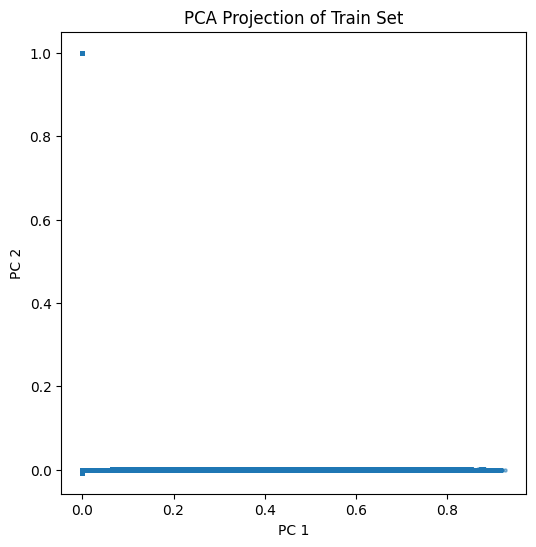

Classes: ['algebra' 'arithmetic' 'calculus' 'comparison' 'measurement' 'numbers'
 'polynomials' 'probability']


/home/rc/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification report on test set:
              precision    recall  f1-score   support

     algebra       0.77      0.45      0.57    160000
  arithmetic       0.59      0.56      0.57    180000
    calculus       0.76      0.56      0.65     40000
  comparison       0.98      0.48      0.65    160000
 measurement       0.79      0.57      0.66     40000
     numbers       0.54      0.89      0.67    340000
 polynomials       0.74      0.55      0.63    160000
 probability       0.72      0.74      0.73     40000

    accuracy                           0.64   1120000
   macro avg       0.74      0.60      0.64   1120000
weighted avg       0.70      0.64      0.63   1120000



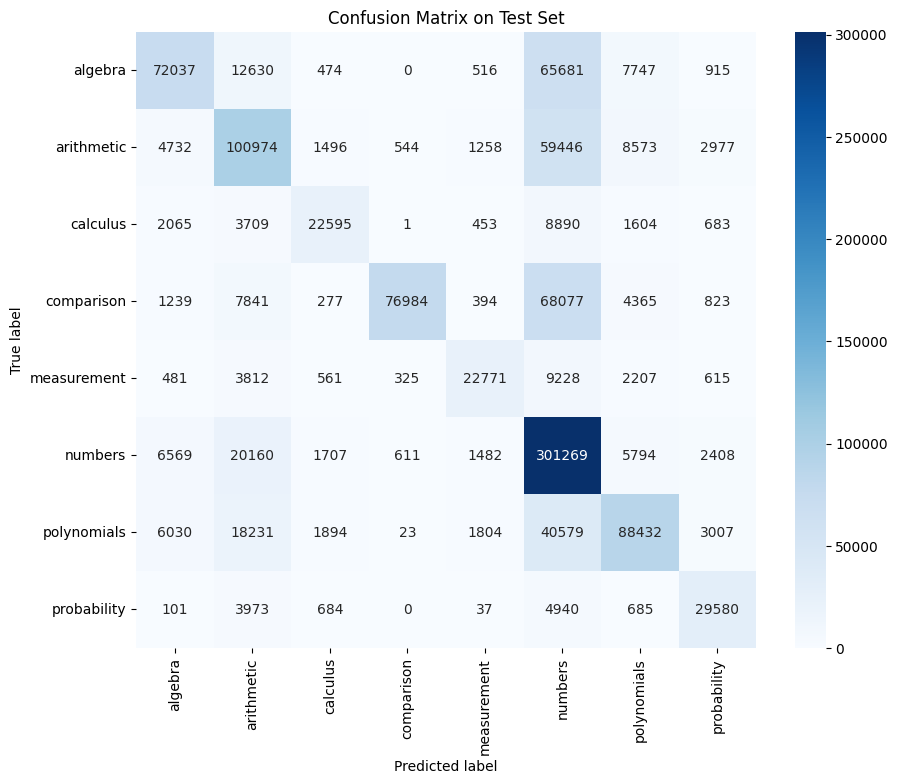

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def load_docs_and_labels(paths):
    docs = []
    labels = []
    for path in paths:
        with open(path, encoding="utf-8") as f:
            lines = [line.strip() for line in f if line.strip()]
            docs.extend(lines)
            # Use prefix before __ as label
            filename = os.path.basename(path)
            label = filename.split("__")[0]
            labels.extend([label] * len(lines))
    return docs, labels

# Expand all files
train_paths = glob.glob("math/train-medium/*.txt")
test_paths = glob.glob("math/interpolate/*.txt")

train_docs, train_labels = load_docs_and_labels(train_paths)
test_docs, test_labels = load_docs_and_labels(test_paths)

print("Train docs:", len(train_docs))
print("Test docs:", len(test_docs))

# ## TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(train_docs)
X_test = vectorizer.transform(test_docs)

print("Train matrix shape:", X_train.shape)
print("Test matrix shape:", X_test.shape)

# ## SVD projection (optional visualization)
svd = TruncatedSVD(n_components=2)
X_proj = svd.fit_transform(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], s=5, alpha=0.5)
plt.title("PCA Projection of Train Set")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# ## Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_labels)
y_test = le.transform(test_labels)

print("Classes:", le.classes_)

# ## Train classifier
clf = LogisticRegression(max_iter=1000, random_state=578)
clf.fit(X_train, y_train)

# ## Predict & evaluate
y_pred = clf.predict(X_test)

print("\nClassification report on test set:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [8]:
print("Feature count in FreeBSD build:", len(vectorizer.get_feature_names_out()))

Feature count in FreeBSD build: 10000


In [ ]:
# test builds on bsd. further work is needed.